# Photon Transfer Notebook

Analyze ramp data, creating linearity and photon transfer curves.

In [1]:
# Make sure that any changes to the dependencies are automatically updated
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
# Tools for opening image stacks and relevant data from fits headers
from cosmos_helper_funcs import get_stacks, label_plot, cosmos_gain_dict, get_mean_images
# Tools for making defect pixel histograms
from defect_pixel_funcs import *
from scipy.optimize import curve_fit

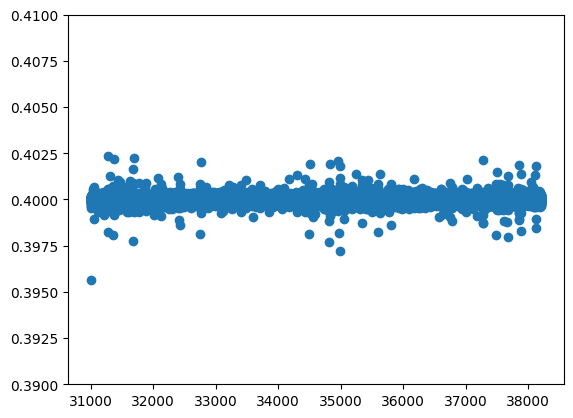

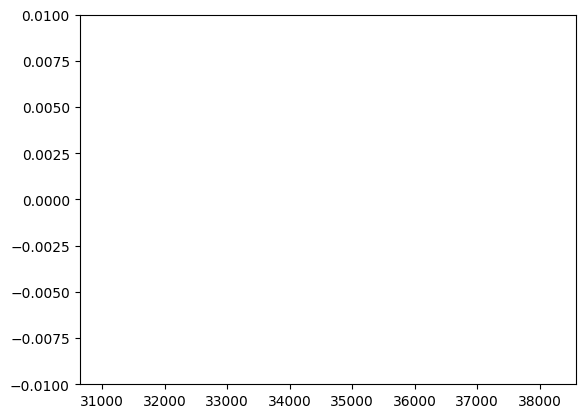

: 

In [15]:
# Look at photodiode readings
pd_readings_file = '/Users/layden/Downloads/ptc_ramp_10_7_24.csv'
# Load csv with readings as numpy array of strings
readings = np.loadtxt(pd_readings_file, delimiter=',', dtype='str')
# Convert the first column to seconds. Need to cut off the starting '10-07-' and convert from 'HH:MM:SS:MS' to seconds
readings[:,0] = [t[6:] for t in readings[:,0]]
time = np.array([float(h)*3600 + float(m)*60 + float(s) for h, m, s in [t.split(':') for t in readings[:,0]]])
readings[:,0] = time
# Convert whole array into floats
readings = readings.astype(float)
readings[:,1] *= 1e9
start_time = 30000
plt.scatter(readings[:,0] - start_time, readings[:,2])
plt.ylim(0.39, 0.41)
plt.show()
plt.scatter(readings[:,0] - start_time, readings[:,2])
plt.ylim(-0.01, 0.01)
plt.show()

In [ ]:
# The folder in which a PTC ramp is stored
ramp_folder = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/MKI Lab data/10-11-2024/Mask Ramps/HSHG_RS/Light'
# Load the files containing the image stacks for the ramp. For each stack, extract only the mean image and the standard deviation image
ramp_images = get_stacks(ramp_folder, get_mean_img=True, get_var_img=False, num_imgs=0, datatype='int')

In [ ]:
# The folder in which a PTC ramp is stored
dark_folder = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/MKI Lab data/10-11-2024/Mask Ramps/HSHG_RS/Dark'
# Load the files containing the image stacks for the ramp. For each stack, extract only the mean image and the standard deviation image
dark_images = get_stacks(dark_folder, get_mean_img=True, get_var_img=False, num_imgs=0, datatype='int')

In [7]:
# Sort bias_stacks by exposure time
ramp_images = sorted(ramp_images, key=lambda x: float(x["exposure_ms"]))
dark_images = sorted(dark_images, key=lambda x: float(x["exposure_ms"]))
exp_times_light = np.array([float(x["exposure_ms"]) for x in ramp_images])
exp_times_dark = np.array([float(x["exposure_ms"]) for x in dark_images])
for i, frame in enumerate(ramp_images):
    frame["mean_img"] = frame["mean_img"] - dark_images[i]["mean_img"]